# Write A Data Science Blog Post
##### by Markus Müller


Content:
- [Introduction](#intro)
- [Data Understanding](#data)
    - [Gather](#gather)
    - [Assess](#assess)
- [Prepare Data](#prep)
    - [Clean](#clean)
- [Question](#q)
    - [Question 1: What is the availability over the year and how does the price develop?](#q1)
    - [Question 2: Where are the BnBs in Boston and how expensive is each of them?](#q2)
    - [Question 3: Which neighbourhoods are the most expensive?](#q3)
    - [Question 4: What features influence the price of a BnB?](#q4)
        - [Data Understanding](#1data)  
            - [assess relevant data](#relevantdata)
        - [Prepare Data for Linear Regression](#prepdata)
            - [clean missing values](#cleanmissing)
            - [assess important variables](#assessimportant)
            - [evaluation of variables](#evaluationvariables)
            - [final adjustments](#finaladjustments)
        - [Data Modelling](#datamodelling)
        - [Result Evaluation](#resultevaluation)
            - [performace measures](#performancemeasures)
            - [coefficient analysis](#coefficientanalysis)
    - [Question 5: How does amenities impact the price?](#q5)
- [Resources](#resources)

<a id='intro'></a>
## Intorduction
This notebook is a deliverable for the Udacity Data Scientist Nanodegree and is the basis for the blog post published on <a href='https://medium.com/@markusmller_92879/so-you-want-to-travel-to-boston-and-take-an-airbnb-here-is-what-you-need-to-know-5fb1d53961a2'>Medium</a>.


Data: Boston Airbnb Open Data from <a href='https://www.kaggle.com/airbnb/boston'>Kaggle</a>

In [1]:
# imports
import datetime
import numpy as np
import pandas as pd
pd.set_option("max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

import chart_studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.io as pio # export plotly visualizations to HTML

from sklearn.linear_model import LinearRegression
from sklearn import metrics


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# set seaborn style to get uniform visualizations

#set base color
b_color = sns.color_palette()[0]
# set seaborn style for uniform 
sns.set_style('whitegrid')

<a id='data'></a>
## Data Understanding
To answer the quesion mentioned in the introduction we will first need to gather the data and then assess it.
Gathering will be esay since the questions can be answered with the Boston Airbnb Open Dataset, which can be find on <a href='https://www.kaggle.com/airbnb/boston'>Kaggle</a>.
After we gathered the data it needs to be assessed this will be done visually and programmatically.

Structure:
- listings: full descriptions and average review score
- reviews: unique id for each reviewer and detailed comments (we wont need this)
- calendar: listing id and the price and availability for that day



<a id='gather'></a>
### Gather

In [3]:
# create folder
folder_name = 'Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# load data into DataFrames
calendar = pd.read_csv('Data/calendar.csv')
listings = pd.read_csv('Data/listings.csv')

<a id='assess'></a>
### Assess

In [5]:
calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [7]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [8]:
calendar[calendar['price'].notna()]

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00


In [9]:
# availabe (t = True / f = False)
calendar.query('available == "f"')

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [10]:
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [12]:
# used this cell to visually assess different columns
listings[['id', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee']]

,id,price,weekly_price,monthly_price,cleaning_fee
0,12147973,$250.00,NaN,NaN,$35.00
1,3075044,$65.00,$400.00,NaN,$10.00
2,6976,$65.00,$395.00,"$1,350.00",NaN
3,1436513,$75.00,NaN,NaN,$50.00
4,7651065,$79.00,NaN,NaN,$15.00
...,...,...,...,...,...
3580,8373729,$69.00,NaN,NaN,NaN
3581,14844274,$150.00,NaN,NaN,$15.00
3582,14585486,$198.00,NaN,NaN,NaN
3583,14603878,$65.00,NaN,NaN,NaN


In [13]:
# used this cell to visually assess different columns
listings[['id', 'host_since', 'first_review', 'last_review', 'neighbourhood', 'neighbourhood_cleansed', 'property_type']]

,id,host_since,first_review,last_review,neighbourhood,neighbourhood_cleansed,property_type
0,12147973,2015-04-15,NaN,NaN,Roslindale,Roslindale,House
1,3075044,2012-06-07,2014-06-01,2016-08-13,Roslindale,Roslindale,Apartment
2,6976,2009-05-11,2009-07-19,2016-08-05,Roslindale,Roslindale,Apartment
3,1436513,2013-04-21,2016-08-28,2016-08-28,NaN,Roslindale,House
4,7651065,2014-05-11,2015-08-18,2016-09-01,Roslindale,Roslindale,House
...,...,...,...,...,...,...,...
3580,8373729,2014-07-31,2015-09-18,2016-08-27,Somerville,Charlestown,Apartment
3581,14844274,2015-07-02,NaN,NaN,NaN,Allston,Apartment
3582,14585486,2014-01-14,NaN,NaN,NaN,Charlestown,Apartment
3583,14603878,2016-05-27,2016-08-27,2016-09-04,Somerville,Charlestown,Apartment


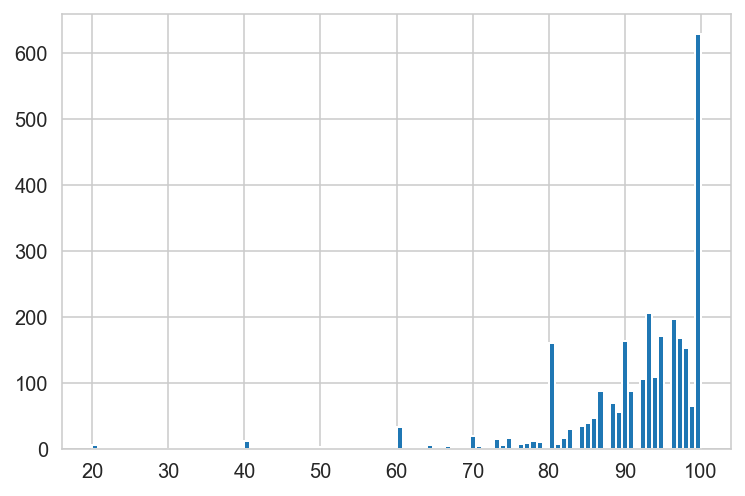

In [14]:
# check distribution of reviews
listings['review_scores_rating'].hist(bins=100);

In [15]:
listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

#### Result Data Assessment

##### calendar
- `price` is an object 
- `price` has outliers
- `date` isn't a DateTimeObject

##### lisitings
- `price` in an object 
- `price` has outliers
- `host_since` isn't a DateTimeObject

<a id='prep'></a>
### Prepare Data
To use the data for the analysis it needs to be cleaned


<a id='clean'></a>
#### Data Cleaning

In [16]:
# copy DataFrames
calendar_clean = calendar.copy()
listings_clean = listings.copy()

##### clean price coloumns

In [17]:
# function to clean and transform 
def clean_price(df, p_column):
    '''clean price 
    
    Keyword arguments:
    df -- pandas DataFrame
    p_column -- price column of the pandas DataFrame as a string
    '''
    
    df['price_clean'] = df[p_column].str.replace('[$,]', '')
    df['price_clean'] = df['price_clean'].astype(float)
    df.drop(columns=p_column, inplace=True)

In [18]:
# apply function
clean_price(calendar_clean, 'price')
clean_price(listings_clean, 'price')

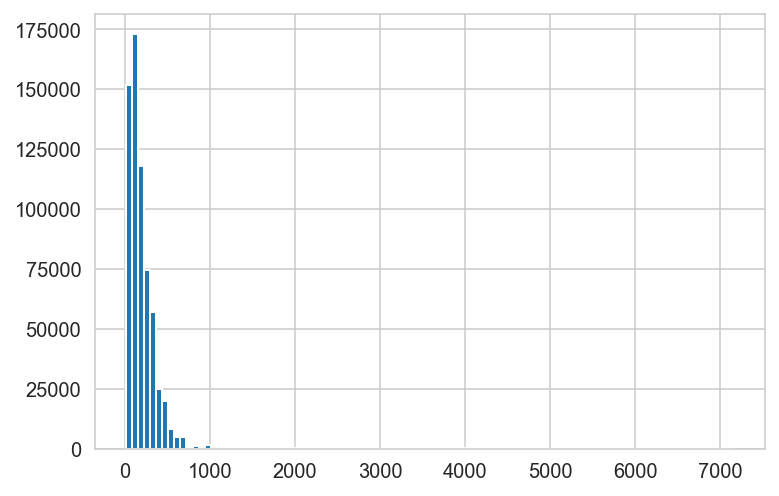

In [19]:
# check values
calendar_clean['price_clean'].hist(bins=100);

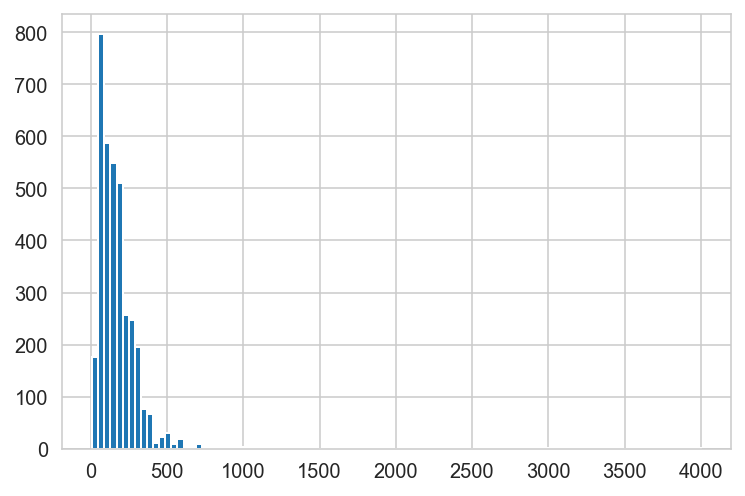

In [20]:
# check values
listings_clean['price_clean'].hist(bins=100);

##### remove outliers in price columns:
- I will remove price higher than 1000 in calendar_clean and higher than 600 in listings_clean

In [21]:
listings_clean = listings_clean.query('price_clean <= 600')

In [22]:
calendar_clean = calendar_clean.query('price_clean <= 1000')

##### transforme date to DateTimeObject and extract day of week

In [23]:
calendar_clean['date'] = pd.to_datetime(calendar_clean['date'], format='%Y-%m-%d')
listings_clean['host_since'] = pd.to_datetime(listings_clean['host_since'], format='%Y-%m-%d')

In [24]:
# get day of week from DateTimeObject
calendar_clean['day_of_week'] = calendar_clean['date'].dt.strftime('%a')

In [25]:
calendar_clean.head(5)

,listing_id,date,available,price_clean,day_of_week
365,3075044,2017-08-22,t,65.0,Tue
366,3075044,2017-08-21,t,65.0,Mon
367,3075044,2017-08-20,t,65.0,Sun
368,3075044,2017-08-19,t,75.0,Sat
369,3075044,2017-08-18,t,75.0,Fri


<a id='q'></a>
## Questions
The data is usable now, so I will try to answer the following questions:
- [Question 1: What is the availability over the year and how does the price develop?](#q1)
- [Question 2: Where are the BnBs in Boston and how expensive is each of them?](#q2)
- [Question 3: Which neighbourhoods are the most expensive?](#q3)
- [Question 4: What features influence the price of a BnB?](#q4)
- [Question 5: How does amenities impact the price?](#q5)

Questions one to three will be answerd with visualizations. To answer question four and five I will need to do some more data wrangling and cleaning to povide a clean model for the linear regression. 

<a id='q1'></a>
### Question 1: What is the availability over the year and how does the price develop?

In [26]:
# create a DataFrame for each instance
available = calendar_clean.query('available == "t"')

In [27]:
available_price = calendar_clean.query('available =="t"').groupby('date')['price_clean'].mean()

In [28]:
# grouoby date to see the availability of each day
available_plot = available.groupby('date').count()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



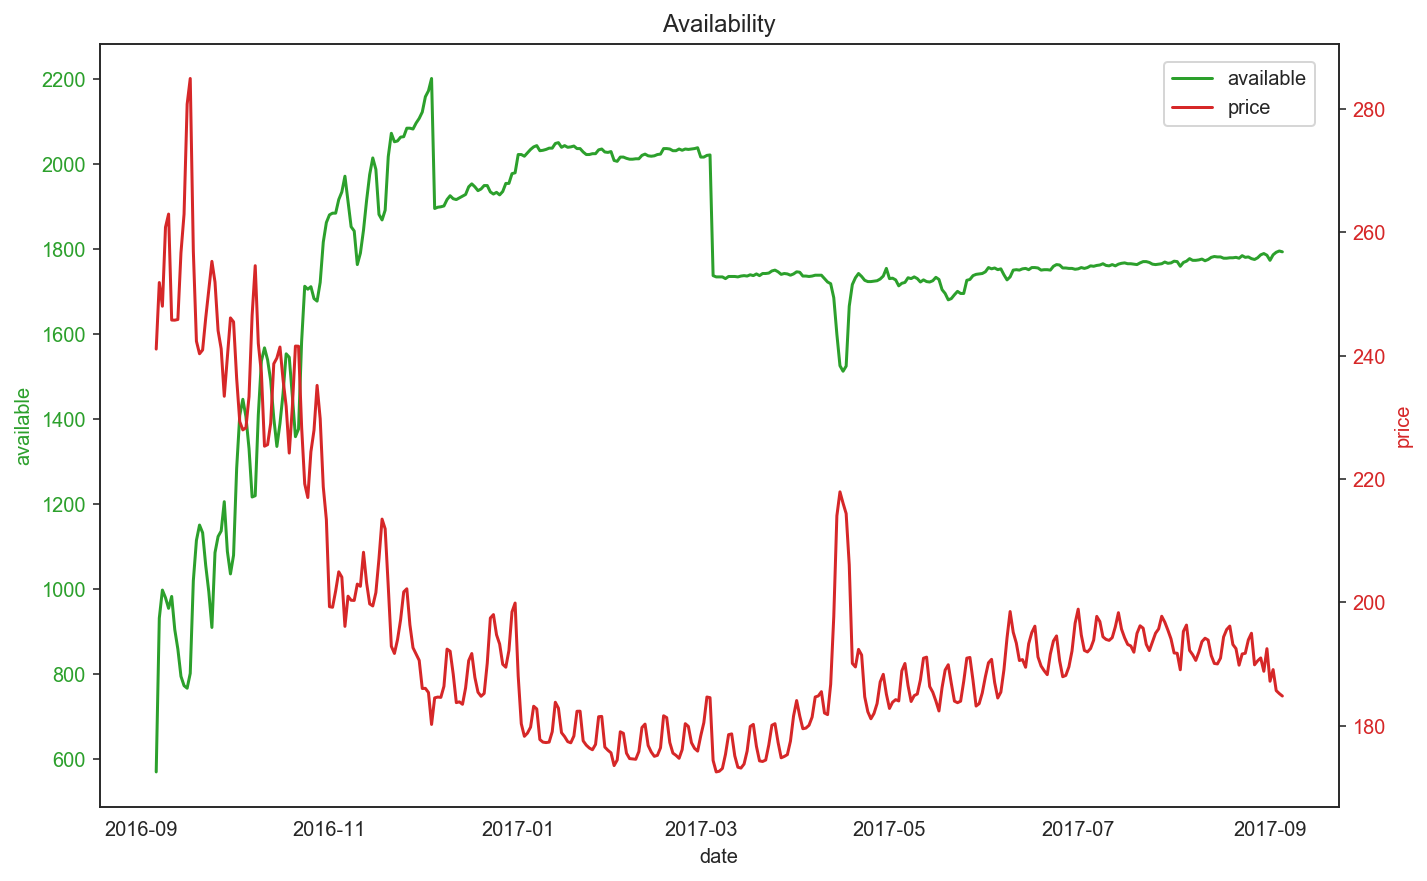

In [29]:
sns.set_style('white') # set seaborn style to remove girdlines for this visualization
fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:green'
ax1.set_xlabel('date')
ax1.set_ylabel('available', color=color)
ax1.plot(available_plot.index, available_plot['listing_id'], label = 'available', color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price', color=color)  # we already handled the x-label with ax1
ax2.plot(available_price.index, available_price.values, label = 'price', color = color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Availability')
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.96))
#plt.savefig('Pictures/Availability.png', dpi=200, bbox_inches='tight');
# https://matplotlib.org/gallery/api/two_scales.html

In [32]:
# price spike 
available_price.loc['2017-04-10':'2017-04-25']

date
2017-04-10    182.035817
2017-04-11    181.777713
2017-04-12    186.699244
2017-04-13    197.688019
2017-04-14    214.005000
2017-04-15    217.897772
2017-04-16    216.058824
2017-04-17    214.378361
2017-04-18    206.053421
2017-04-19    190.080955
2017-04-20    189.504905
2017-04-21    192.355709
2017-04-22    191.444700
2017-04-23    184.668790
2017-04-24    182.250580
2017-04-25    181.105568
Name: price_clean, dtype: float64

- there seems to be some seasonality in the price, because it has almost the same pattern 
- the price spike is around the Boston Marathon which was on the 17th, April

In [33]:
# transform to cat to polt days of week in order
available['day_of_week'] = pd.Categorical(available['day_of_week'], 
                                          categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                          ordered=True)

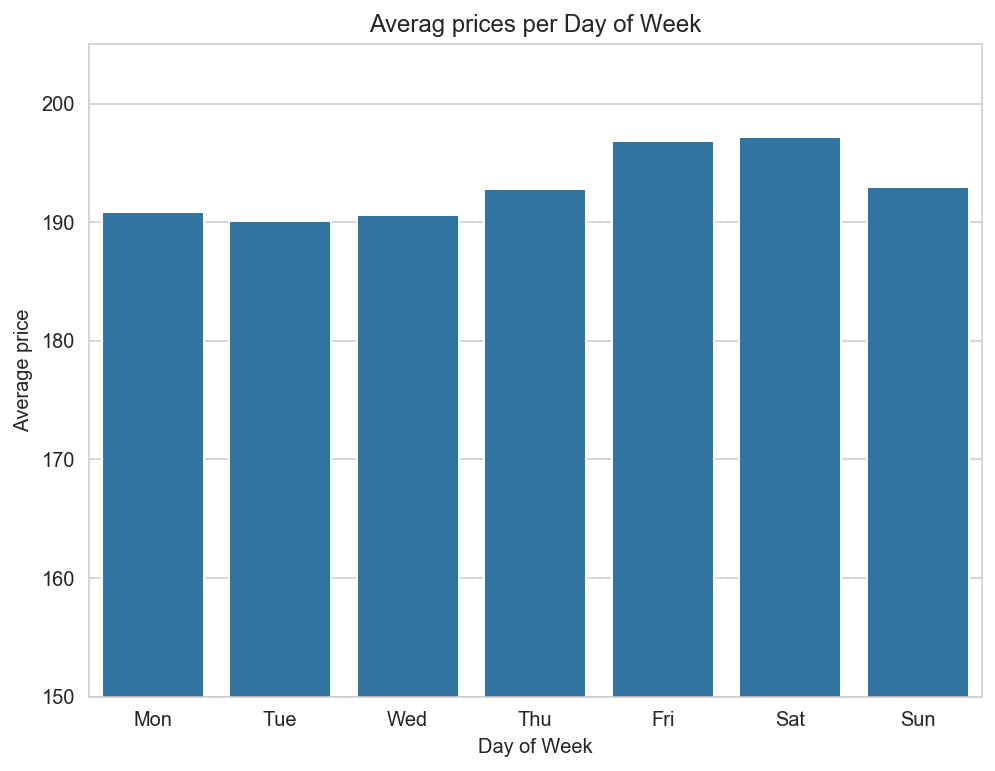

In [34]:
sns.set_style('whitegrid')
fig = plt.subplots(figsize=(8,6))
sns.barplot(x='day_of_week', y='price_clean', data=available, color=b_color, ci= None)
plt.title('Averag prices per Day of Week')
plt.ylabel('Average price')
plt.xlabel('Day of Week')
plt.ylim(150,205)
#plt.savefig('Pictures/Average_prices_per_DOW.png', dpi=200);

- there is a slightly higher price on Fridays and Saturdays

<a id='q2'></a>
### Question 2: Where are the BnBs in Boston and how expensive are each of them?

In [205]:
# auth for plotly chart studio
username = 'XXXX'
api_key = 'XXXX' 
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

#token for mapbox layers
token = 'XXXX'

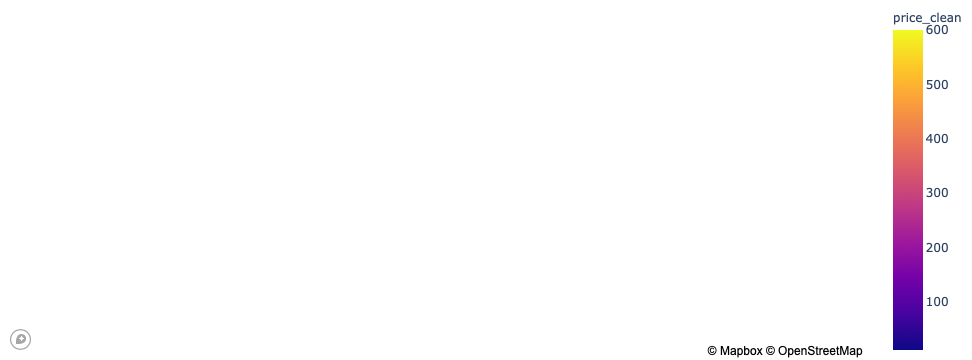

'https://plotly.com/~Markinger/1/'

In [206]:
fig = px.scatter_mapbox(listings_clean, lat='latitude', lon="longitude", 
                        hover_data=['price_clean', 'neighbourhood_cleansed'],
                        color='price_clean', zoom=10, height=300,
                       )
fig.update_layout(mapbox_style='light', mapbox_accesstoken=token)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()
# https://plotly.com/python/mapbox-layers/

# saves the output as HTML
pio.write_html(fig, file='index.html', auto_open=True)
# https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

# upload to plotly
py.plot(fig, filename = 'Boston_AirBnB', auto_open=True)

<a id='q3'></a>
### Question 3: Which neighbourhoods are the most expensive?

In [36]:
# crate DataFrame with neighbourhood informations
neighbourhoods = listings_clean[['id', 'neighbourhood', 'neighbourhood_cleansed', 'price_clean']]

In [37]:
# how many neighbourhoods are in the dataset
neighbourhoods['neighbourhood_cleansed'].nunique()

25

In [38]:
neighbourhoods['neighbourhood_cleansed'].value_counts()

Jamaica Plain              341
South End                  322
Back Bay                   298
Fenway                     283
Dorchester                 269
Allston                    260
Beacon Hill                187
Brighton                   184
Downtown                   172
South Boston               171
East Boston                150
North End                  143
Roxbury                    141
Mission Hill               123
Charlestown                109
South Boston Waterfront     79
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [39]:
# make a groupby and sort values to uncover expensive and cheap neighbourhoods
neighbourhoods.groupby('neighbourhood_cleansed')['price_clean'].mean().sort_values(ascending = False)

neighbourhood_cleansed
Bay Village                266.833333
Leather District           253.600000
South Boston Waterfront    252.493671
Downtown                   236.459302
Chinatown                  232.352113
Back Bay                   232.040268
West End                   209.591837
Beacon Hill                199.486631
South End                  196.173913
North End                  195.678322
Fenway                     192.975265
Charlestown                186.266055
South Boston               176.865497
Longwood Medical Area      138.444444
Jamaica Plain              134.964809
Roxbury                    130.475177
East Boston                119.153333
Mission Hill               115.869919
Brighton                   113.983696
Allston                    112.307692
West Roxbury               107.108696
Roslindale                  98.428571
Dorchester                  91.639405
Hyde Park                   86.548387
Mattapan                    75.125000
Name: price_clean, dtype: f

In [40]:
neighbourhoods['price_clean'].mean()

165.02903862418947

In [41]:
# calculate the mean difference from the mean for each neighbourhood
neighbourhoods['diff_to_mean'] = neighbourhoods['price_clean'] - neighbourhoods['price_clean'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



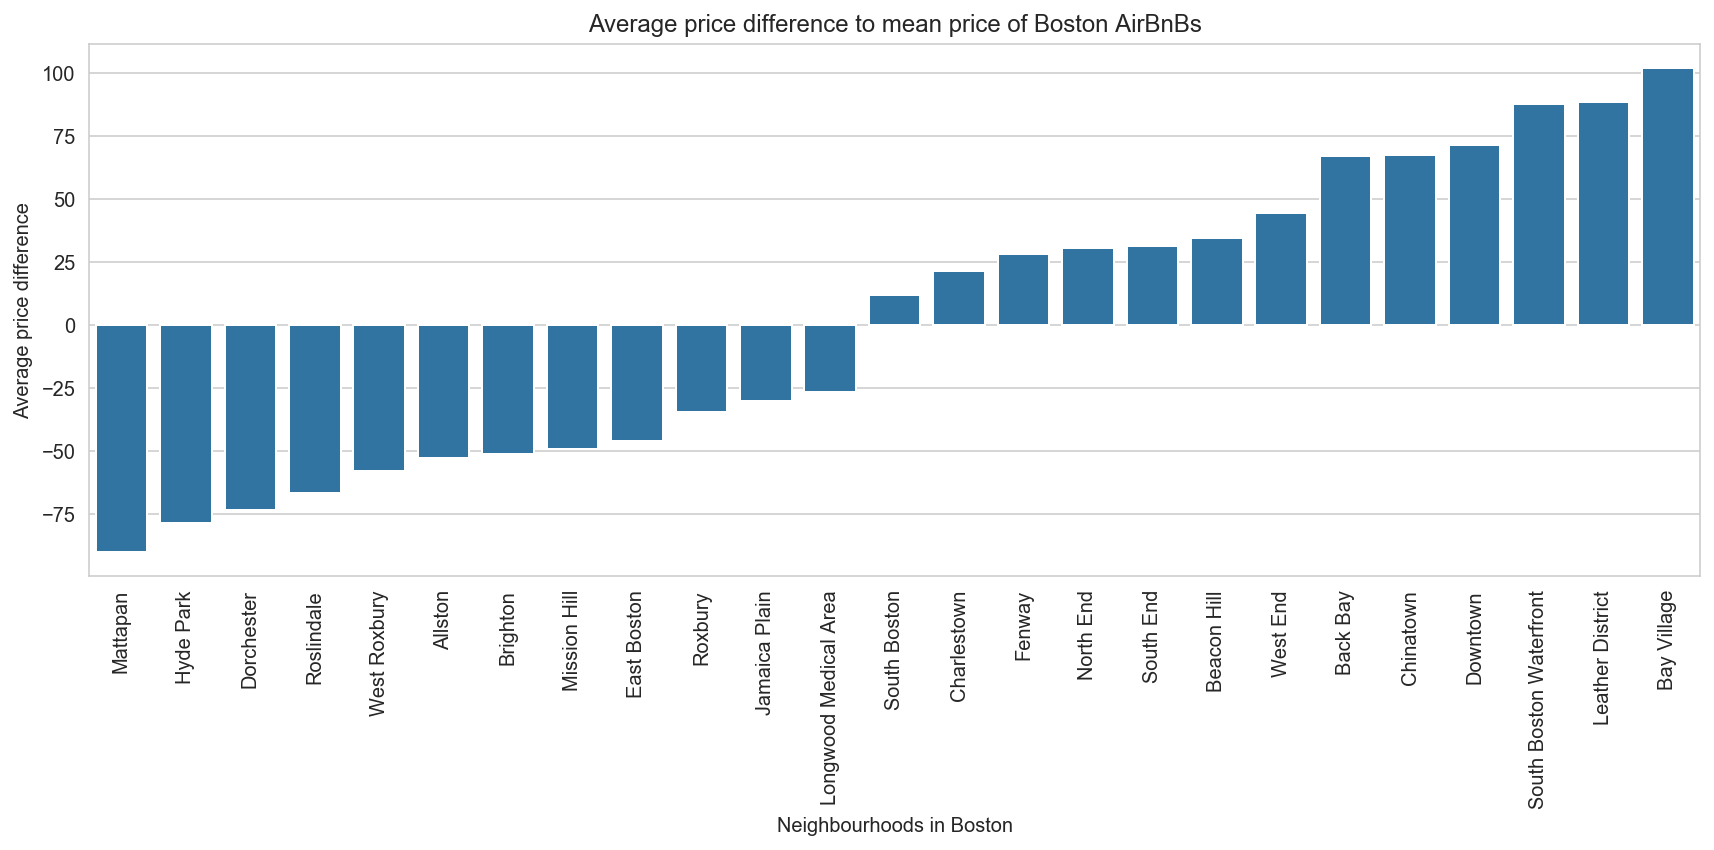

In [42]:
fig = plt.subplots(figsize=(12,6))
sns.barplot(x='neighbourhood_cleansed', y='diff_to_mean', data=neighbourhoods, 
            order=neighbourhoods.groupby('neighbourhood_cleansed')['diff_to_mean'].mean().sort_values().index,
            ci= None, color=b_color)
#plt.xticks(rotation=90)
plt.title('Average price difference to mean price of Boston AirBnBs')
plt.xlabel('Neighbourhoods in Boston')
plt.ylabel('Average price difference')
plt.xticks(rotation='vertical')
plt.tight_layout()
#plt.savefig('Pictures/Neighbourhood_average_prices.png', dpi=200);

<a id='q4'></a>
### Question 4: What features influnece the price of a BnB?
To answer this question I will need to do more steps related to data assessment and cleaning as well as modelling and evaluation of the results so here is the list with the content:
- [Data Understanding](#1data)  
    - [assess relevant data](#relevantdata)
- [Prepare Data for Linear Regression](#prepdata)
    - [clean missing values](#cleanmissing)
    - [assess important variables](#assessimportant)
    - [evaluation of variables](#evaluationvariables)
    - [final adjustments](#finaladjustments)
- [Data Modelling](#datamodelling)
- [Result Evaluation](#resultevaluation)
    - [performace measures](#performancemeasures)
    - [coefficient analysis](#coefficientanalysis)

<a id='1data'></a>
#### Data Understanding
<a id='relevantdata'></a>
##### assess relevant data

In [43]:
#create a DataFrame which contains possible variables influencing price 
model = listings_clean[['id', 'bedrooms', 'beds', 'bed_type', 'room_type','bathrooms', 'property_type', 
                        'neighbourhood_cleansed', 'cancellation_policy', 'number_of_reviews',
                        'review_scores_rating', 'reviews_per_month', 'host_is_superhost', 'amenities',
                        'guests_included', 'square_feet', 'price_clean']]

In [44]:
model.isnull().sum()

id                           0
bedrooms                    10
beds                         9
bed_type                     0
room_type                    0
bathrooms                   14
property_type                3
neighbourhood_cleansed       0
cancellation_policy          0
number_of_reviews            0
review_scores_rating       798
reviews_per_month          742
host_is_superhost            0
amenities                    0
guests_included              0
square_feet               3492
price_clean                  0
dtype: int64

In [45]:
model['bedrooms'].value_counts()

1.0    2367
2.0     684
0.0     287
3.0     147
4.0      39
5.0      13
Name: bedrooms, dtype: int64

In [46]:
model['beds'].corr(model['bedrooms'])

0.6975409285801463

In [47]:
model['bathrooms'].mean()#.value_counts()

1.2135578828191338

In [48]:
model['property_type'].value_counts()

Apartment          2586
House               554
Condominium         228
Townhouse            53
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [49]:
model['review_scores_rating'].median()

94.0

In [50]:
model['reviews_per_month'].value_counts()

1.00    114
2.00     53
0.08     28
3.00     26
0.09     26
       ... 
6.96      1
5.83      1
6.13      1
4.95      1
4.89      1
Name: reviews_per_month, Length: 644, dtype: int64

<a id='prepdata'></a>
#### Prepare Data for Linear Regression
<a id='cleanmissing'></a>
##### cleaning missing values


How to handle missing values:
- `square_feet` gets droped, because it has to many missing values
- `bedrooms`: since the mean is 1.24 and mode is 1, all missing values will get filled with 1
- `beds`: gets droped -> correlates with bedrooms
- `bathrooms`: since the mean is 1.21 and the mode is 1, all missing values will get filled with 1
- `property_type`: the three missing ones will be added to other
- `review_scores_rating`: because there is no pattern behind the missing value I will use the random sample method
- `reviews_per_month`: random sample method

more methods: https://towardsdatascience.com/8-clutch-ways-to-impute-missing-data-690481c6cb2b

In [51]:
# drop square_feet and beds
model.drop(columns=['square_feet', 'beds'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
# bedrooms and bathrooms fill missing values with 1
model['bedrooms'] = model['bedrooms'].fillna(value=1)
model['bathrooms'] = model['bathrooms'].fillna(value=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
# change property_type 
model['property_type'] = model['property_type'].fillna(value='Other')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
#  https://stackoverflow.com/questions/36413314/filling-missing-data-by-random-choosing-from-non-missing-values-in-pandas-datafr
def fill_with_random(df2, column):
    '''Fill `df2`'s column with name `column` with random data based on non-NaN data from `column`'''
    df = df2.copy()
    df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) if np.isnan(x) else x)
    return df

In [55]:
model = fill_with_random(model, 'review_scores_rating')
model = fill_with_random(model, 'reviews_per_month')

In [56]:
# check for missing values
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 0 to 3584
Data columns (total 15 columns):
id                        3547 non-null int64
bedrooms                  3547 non-null float64
bed_type                  3547 non-null object
room_type                 3547 non-null object
bathrooms                 3547 non-null float64
property_type             3547 non-null object
neighbourhood_cleansed    3547 non-null object
cancellation_policy       3547 non-null object
number_of_reviews         3547 non-null int64
review_scores_rating      3547 non-null float64
reviews_per_month         3547 non-null float64
host_is_superhost         3547 non-null object
amenities                 3547 non-null object
guests_included           3547 non-null int64
price_clean               3547 non-null float64
dtypes: float64(5), int64(3), object(7)
memory usage: 443.4+ KB


<a id='assessimportant'></a>
##### assess important variables
- correlation matrix for numeric variables
- boxplots for categorical variables

In [57]:
#colums which could be ralated to the price 
price_corr = model[['price_clean', 'bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 
                   'guests_included']]

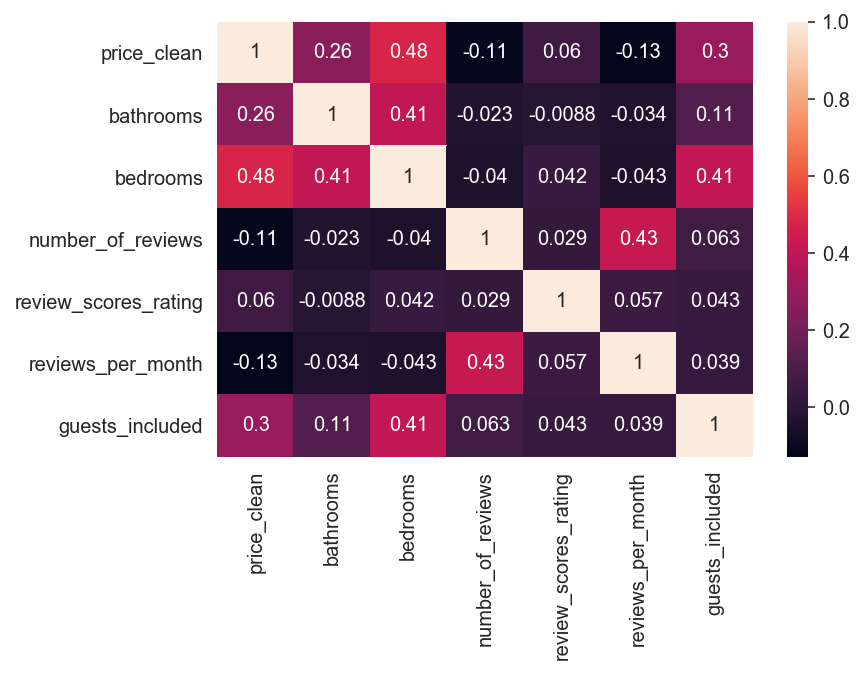

In [58]:
# create heatmap which shows the corrleation matrix
sns.heatmap(price_corr.corr(), annot=True);

There are some medium correlations for `bathrooms`, `bedrooms` and `gusts_included`. There are also very small correlations for `number of reviews` and `reviews per month`. Intersting is that the review score isn't corrleated with price.

In [59]:
# lets check the mean price distribution for the reveiw scores
score = model.groupby('review_scores_rating')['price_clean'].mean().index
mean_price = model.groupby('review_scores_rating')['price_clean'].mean().values

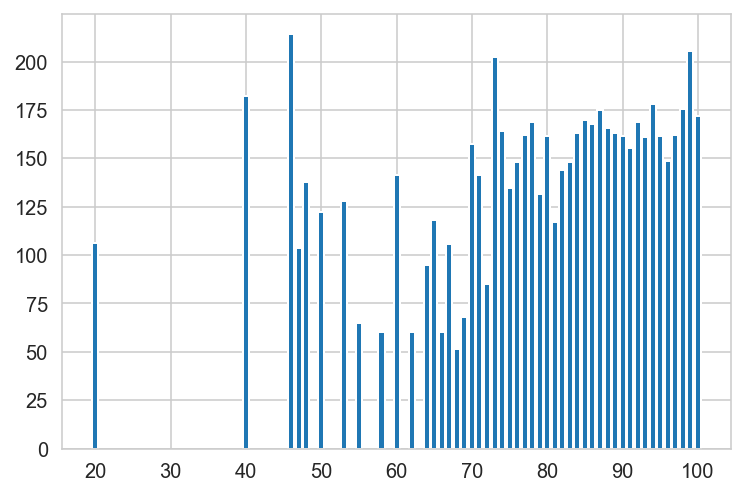

In [60]:
plt.bar(x=score, height=mean_price);

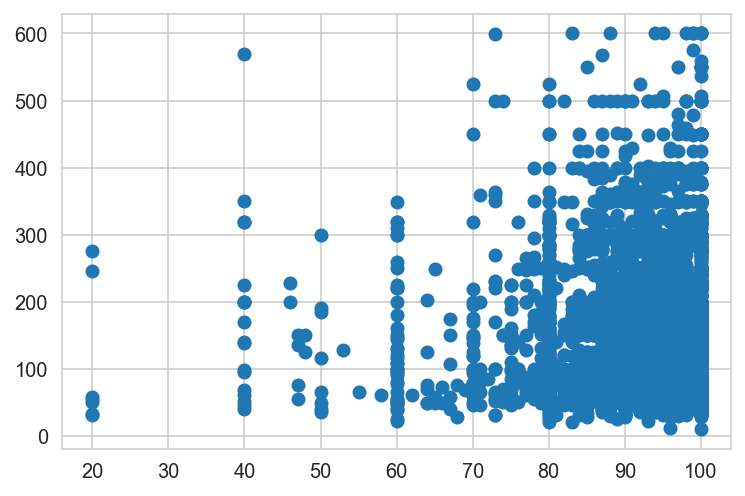

In [61]:
plt.scatter(x=model['review_scores_rating'], y=model['price_clean']);

There is no linearity between review score and price.

##### Let us now explore the relationship between price and the categorical variables

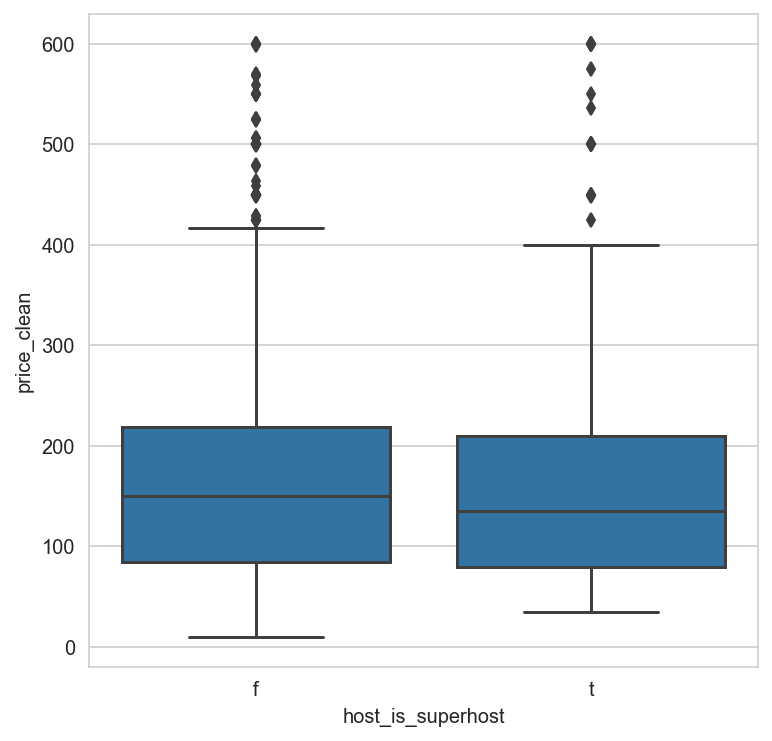

In [62]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='host_is_superhost', y='price_clean', data=listings_clean, color=b_color);

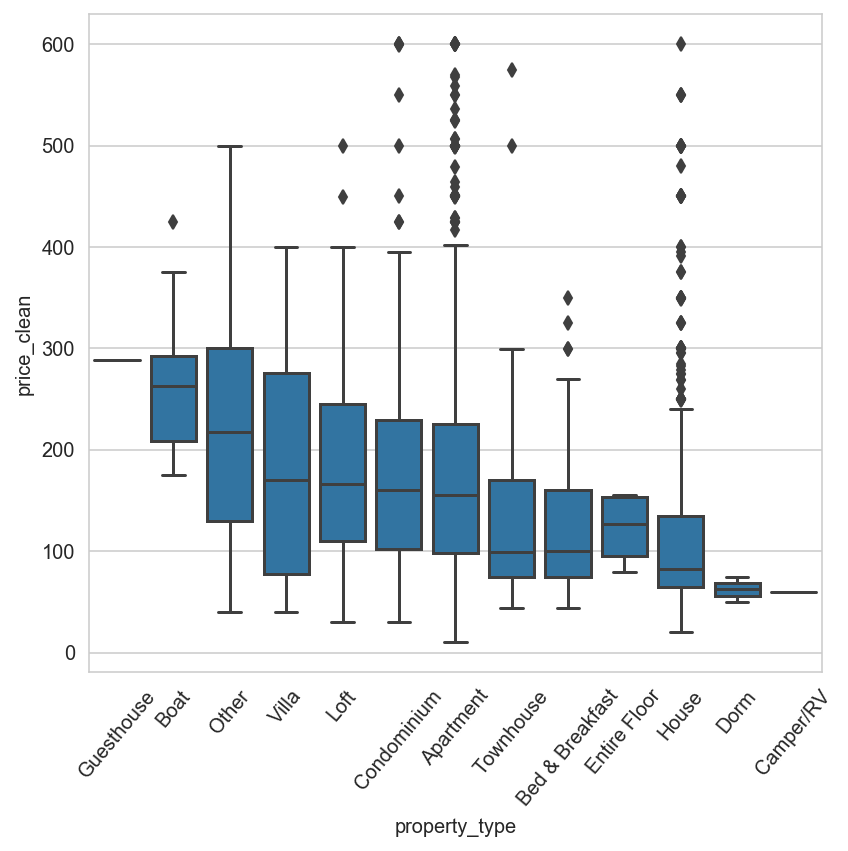

In [63]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='property_type', y='price_clean', data=listings_clean, 
            order=listings_clean.groupby('property_type')['price_clean'].mean().sort_values(ascending=False).index, 
            color=b_color)
plt.xticks(rotation=50)
plt.tight_layout();

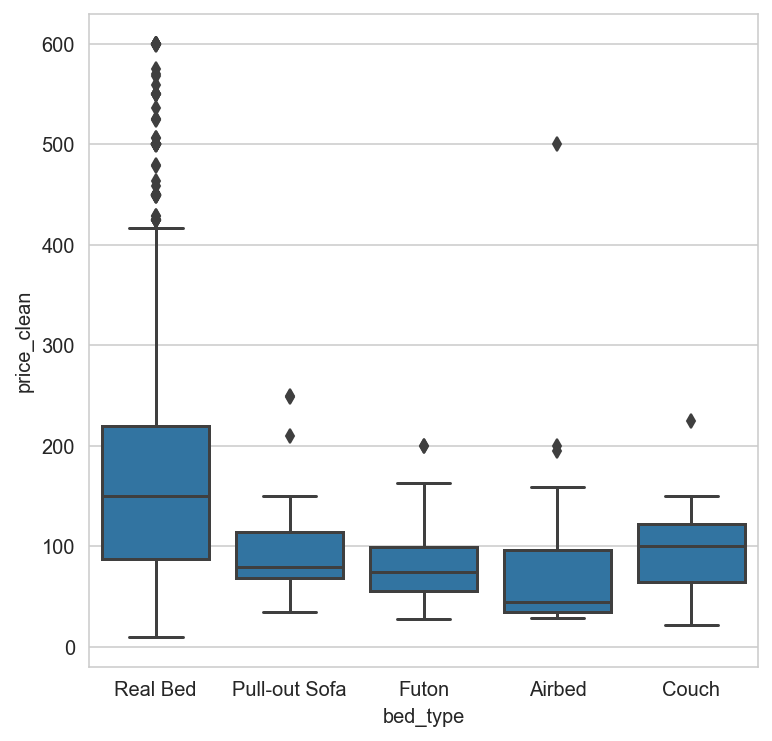

In [64]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='bed_type', y='price_clean', data=listings_clean, color=b_color);

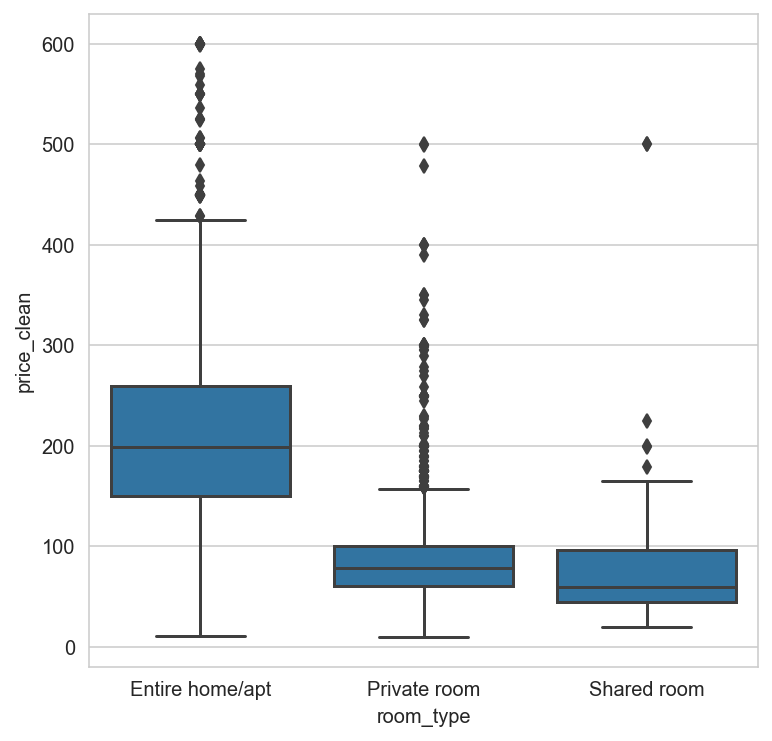

In [65]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='room_type', y='price_clean', data=listings_clean, color=b_color);

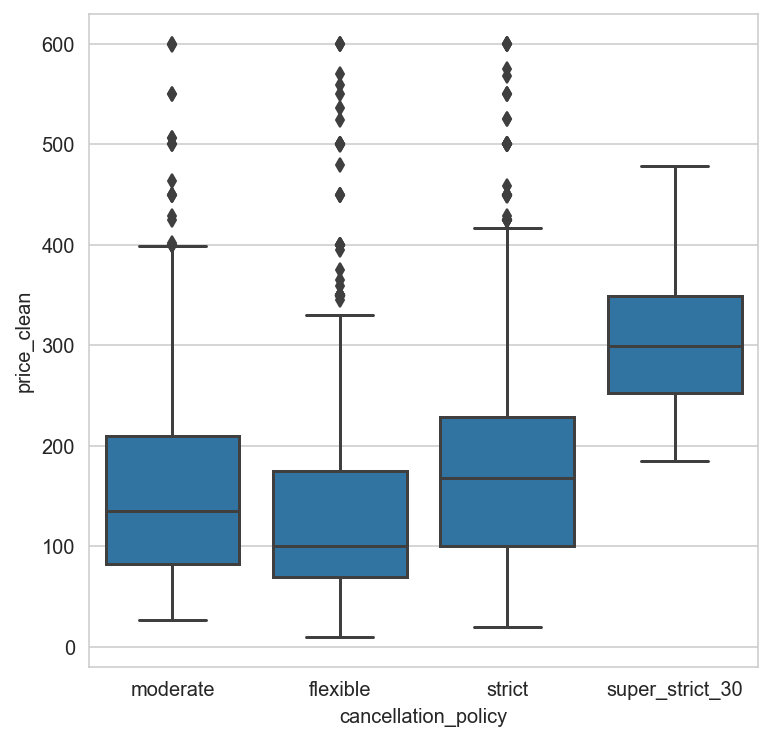

In [66]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='cancellation_policy', y='price_clean', data=listings_clean, color=b_color);

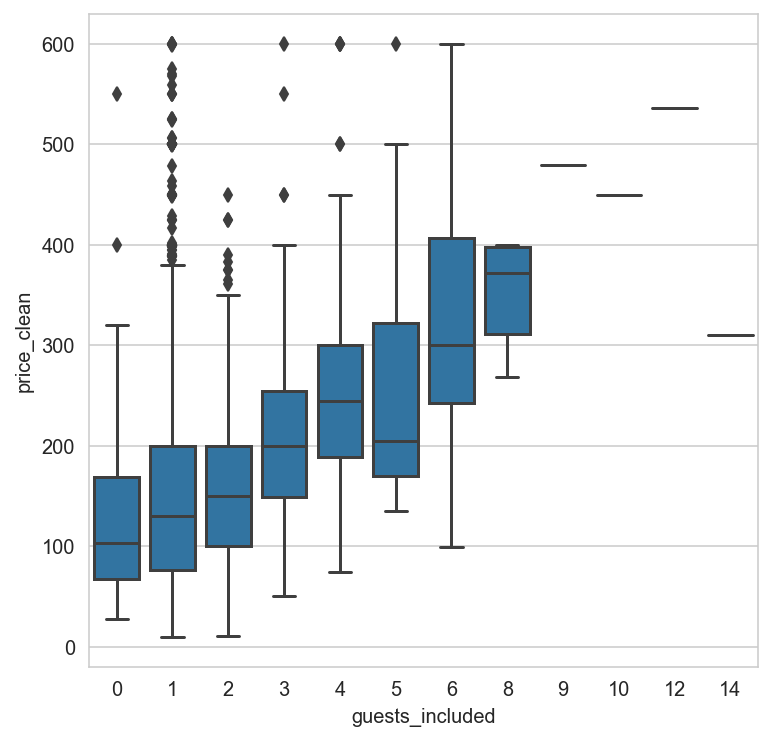

In [67]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(x='guests_included', y='price_clean', data=listings_clean, color=b_color);

<a id='evaluationvariables'></a>
##### evaluation of variables
- `neighbourhood_cleansed`: showed a lot of variance between different neighbourhoods (will be included)
- `bathrooms`, `bedromms` and `guests_included`: each had medium correlations with price (will be included)
- `review_scores_rating` hadn't a high correlation and the visual assesment didn't show an obvious pattern
- `square_feet` would be interesting, but there are to many missing values (won't be included)
- `property_type`: showed differences in mean price between different types (will be included)
- `host_is_superhost`: no difference in mean price, iff a host is or isn't a Superhost (won't be included)
- `cancalation_policy`: showed differences in mean price between different policies (will be included)
- `room_type`: showed differences in mean price between different types (will be included)
- `bed_type`: showed differences in mean price between different types (will be included)
- `amenities`: wasn't capable to show impact on price but, it is logical that different amenities are impacting the price 

<a id='finaladjustments'></a>
##### final adjustments
To do a linear regression we need to make some transformations:
- drop unrelevant columns 
-`price` is skwed so it should be transformed but then it the oiutput from the regression looses its interpretability, so I won't transform price
- `property_type`: unpopular types will be summarized as other
- `guests_included`: combine 7 and more into one category 
- `amenities`: needs some preprocesssing
- categorical columns like: `neighbourhood_cleansed`, `bathrooms`, `cancellation_policy`, `bedrooms`, `property_type` need to be transformed to dummy variables
- create `x` and `Y` DataFrames 
- split data

drop unrelevant columns:

In [68]:
model.columns

Index(['id', 'bedrooms', 'bed_type', 'room_type', 'bathrooms', 'property_type',
       'neighbourhood_cleansed', 'cancellation_policy', 'number_of_reviews',
       'review_scores_rating', 'reviews_per_month', 'host_is_superhost',
       'amenities', 'guests_included', 'price_clean'],
      dtype='object')

In [69]:
model.drop(columns=['review_scores_rating', 'host_is_superhost', 'id'], inplace=True)

transform unpopular types to Other:

In [70]:
model['property_type'].value_counts()
# everything samller as Other will be included in Other

Apartment          2586
House               554
Condominium         228
Townhouse            53
Bed & Breakfast      41
Loft                 39
Other                20
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [71]:
types = ['Boat', 'Villa', 'Entire Floor', 'Dorm', 'Camper/RV', 'Guesthouse']
for ptype in types:
    model['property_type'] = np.where(model['property_type'] == ptype, 
                                               'Other', model['property_type'])

In [72]:
model['property_type'].value_counts()

Apartment          2586
House               554
Condominium         228
Townhouse            53
Other                46
Bed & Breakfast      41
Loft                 39
Name: property_type, dtype: int64

guests included: combine 7 and more into one category:

In [73]:
values = [7, 8, 9, 10, 11, 12, 14]
for x in values:
    model['guests_included'] = np.where(model['guests_included'] == x, 
                                                 7, model['guests_included'])

In [74]:
model['guests_included'].value_counts()

1    2578
2     552
4     167
3      91
0      87
6      36
5      26
7      10
Name: guests_included, dtype: int64

get dummy variables for amenities:

In [75]:
model['amenities'].head(2)

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
Name: amenities, dtype: object

In [76]:
# remove {}
model['amenities'] = model['amenities'].str.replace("[{}]", "")

In [77]:
# get dummies
amenity_dummy = model['amenities'].str.get_dummies(sep = ",")

In [78]:
# drop 'translation missing' amenities
amenity_dummy.drop(columns=['"translation missing: en.hosting_amenity_49"', '"translation missing: en.hosting_amenity_50"'], inplace=True)

In [79]:
# remove double quots from columns names
amenity_dummy.columns = amenity_dummy.columns.str.replace('"','')

In [80]:
amenity_dummy.head(2)

,24-Hour Check-in,Air Conditioning,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Elevator in Building,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Hair Dryer,Hot Tub,Indoor Fireplace,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Safety Card,Smoke Detector,Smoking Allowed,Suitable for Events,Washer / Dryer,Wheelchair Accessible,Wireless Internet,Breakfast,Cat(s),Dog(s),Doorman,Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1
1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1


In [81]:
# lets check how often individual amenities are included
amenity_dummy.sum()

24-Hour Check-in              1232
Air Conditioning              2785
Buzzer/Wireless Intercom       825
Cable TV                      1747
Carbon Monoxide Detector      2414
Elevator in Building           854
Family/Kid Friendly           1860
Fire Extinguisher             1561
First Aid Kit                 1049
Free Parking on Premises       824
Free Parking on Street           9
Hair Dryer                    1791
Hot Tub                        165
Indoor Fireplace               385
Laptop Friendly Workspace     1814
Lock on Bedroom Door           471
Other pet(s)                    16
Paid Parking Off Premises        4
Pets Allowed                   478
Pets live on this property     423
Safety Card                    453
Smoke Detector                2880
Smoking Allowed                 94
Suitable for Events            136
Washer / Dryer                   1
Wheelchair Accessible          148
Wireless Internet             3385
Breakfast                      314
Cat(s)              

It seems that some amenities are offered very rarely(<10), like: Free Parking on Street(9), Paid Parking Off Premises(4) and Washer / Dryer (1). I will drop those columns 

In [82]:
amenity_dummy.drop(columns=['Free Parking on Street', 'Paid Parking Off Premises', 'Washer / Dryer'], inplace=True)

create dummy variables for every categorical feature:

In [83]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 0 to 3584
Data columns (total 12 columns):
bedrooms                  3547 non-null float64
bed_type                  3547 non-null object
room_type                 3547 non-null object
bathrooms                 3547 non-null float64
property_type             3547 non-null object
neighbourhood_cleansed    3547 non-null object
cancellation_policy       3547 non-null object
number_of_reviews         3547 non-null int64
reviews_per_month         3547 non-null float64
amenities                 3547 non-null object
guests_included           3547 non-null int64
price_clean               3547 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 360.2+ KB


In [84]:
model_cat = model.select_dtypes(include='object')
# drop amenities since we allready created the dummy variables
model_cat.drop(columns='amenities', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
model_cat_dummy = pd.get_dummies(model_cat, drop_first=True)

In [86]:
model_cat_dummy = model_cat_dummy.astype('int64')

concat everything:

In [87]:
model_all = pd.concat([model.select_dtypes(include=['float64', 'int64']), model_cat_dummy, amenity_dummy], axis=1)

In [88]:
model_all.head(2)

,bedrooms,bathrooms,number_of_reviews,reviews_per_month,guests_included,price_clean,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,room_type_Private room,room_type_Shared room,property_type_Bed & Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,24-Hour Check-in,Air Conditioning,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Elevator in Building,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Hair Dryer,Hot Tub,Indoor Fireplace,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Safety Card,Smoke Detector,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Wireless Internet,Breakfast,Cat(s),Dog(s),Doorman,Dryer,Essentials,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,2.0,1.5,0,0.98,1,250.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1
1,1.0,1.0,36,1.30,0,65.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1


<a id='datamodelling'></a>
#### Data Modelling

Linear Regression Model:
normally there should be a split in train and test data, but my goal is to calculate the impact of the features and not make a price predicting model

In [89]:
# create x and Y
X = model_all.drop(columns='price_clean')
y = model_all['price_clean']

In [90]:
lin_reg = LinearRegression()

In [91]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_pred= lin_reg.predict(X)

<a id='resultevaluation'></a>
#### Result Evaluation
<a id='performancemeasures'></a>
##### performance measures

In [93]:
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE: 41.74709924402652
MSE: 3643.400413040679
RMSE: 60.36058658628724


In [94]:
r_squared = metrics.r2_score(y, y_pred)
r_squared

0.644003504946113

- On overagre our model is $60 (RMSE) of for each prediction. RMSE lets us show the difference in the y unit. 
- R-squered is the generall fit of the model to the price. 0.64 means that this model can explain 64% of the variance in price.

I could try to improve these values, but it isn't the goal of this regression. Let us now show the individual coefficients.

<a id='coefficientanalysis'></a>
##### coefficient analysis

In [95]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,45.408682
bathrooms,15.269009
number_of_reviews,-0.104292
reviews_per_month,-1.956932
guests_included,9.259915
...,...
Kitchen,-19.561694
Pool,-15.997259
Shampoo,6.227712
TV,12.915096


In [96]:
coeff_df['Coefficient'].sort_values(ascending=False).head(20)

neighbourhood_cleansed_Bay Village                95.778159
neighbourhood_cleansed_Back Bay                   76.289711
neighbourhood_cleansed_South Boston Waterfront    69.166550
neighbourhood_cleansed_Leather District           67.720287
neighbourhood_cleansed_Downtown                   67.527154
neighbourhood_cleansed_Beacon Hill                65.417872
cancellation_policy_super_strict_30               62.097115
neighbourhood_cleansed_Chinatown                  51.794669
neighbourhood_cleansed_South End                  50.275941
bedrooms                                          45.408682
neighbourhood_cleansed_Fenway                     43.214423
neighbourhood_cleansed_North End                  42.277623
property_type_Other                               40.480894
neighbourhood_cleansed_Charlestown                40.067344
neighbourhood_cleansed_South Boston               23.377419
neighbourhood_cleansed_Longwood Medical Area      20.400161
Doorman                                 

In [118]:
coeff_df['Coefficient'].sort_values(ascending=False).tail(10)

Pool                                -15.997259
neighbourhood_cleansed_Dorchester   -17.325086
neighbourhood_cleansed_Mattapan     -18.467941
bed_type_Couch                      -18.820806
Kitchen                             -19.561694
Other pet(s)                        -20.292530
neighbourhood_cleansed_Roslindale   -24.225362
neighbourhood_cleansed_Hyde Park    -25.716243
room_type_Private room              -60.483492
room_type_Shared room               -69.398872
Name: Coefficient, dtype: float64

In [98]:
# code from Kaggle: https://www.kaggle.com/residentmario/modeling-prices
coefs = list(zip(lin_reg.coef_, X))
coefs

[(45.40868229963604, 'bedrooms'),
 (15.269008648531033, 'bathrooms'),
 (-0.10429214786155683, 'number_of_reviews'),
 (-1.9569324455247976, 'reviews_per_month'),
 (9.259915458524778, 'guests_included'),
 (-18.820806176881486, 'bed_type_Couch'),
 (-15.169803303571841, 'bed_type_Futon'),
 (-14.19064897356554, 'bed_type_Pull-out Sofa'),
 (-4.901835808949812, 'bed_type_Real Bed'),
 (-60.483491745278336, 'room_type_Private room'),
 (-69.39887243807135, 'room_type_Shared room'),
 (11.92485798990359, 'property_type_Bed & Breakfast'),
 (7.59628514908186, 'property_type_Condominium'),
 (6.513648471167813, 'property_type_House'),
 (6.024823772163749, 'property_type_Loft'),
 (40.48089387719032, 'property_type_Other'),
 (14.515738293281707, 'property_type_Townhouse'),
 (76.28971118322042, 'neighbourhood_cleansed_Back Bay'),
 (95.77815899932425, 'neighbourhood_cleansed_Bay Village'),
 (65.41787201801343, 'neighbourhood_cleansed_Beacon Hill'),
 (-3.894968430208543, 'neighbourhood_cleansed_Brighton'),

In [179]:
# crate DateFrame for each feature
bed_type = coeff_df.loc['bed_type_Couch':'bed_type_Real Bed']
room_type = coeff_df.loc['room_type_Private room':'room_type_Shared room']
property_type = coeff_df.loc['property_type_Bed & Breakfast':'property_type_Townhouse']
cancellation_policy = coeff_df.loc['cancellation_policy_moderate':'cancellation_policy_super_strict_30']
num_values = coeff_df.loc['bedrooms':'guests_included']

neighbourhood_coeff = coeff_df.loc['neighbourhood_cleansed_Back Bay':'neighbourhood_cleansed_West Roxbury']

amenity_coeff = coeff_df.loc['24-Hour Check-in':'Washer']

In [178]:
cat_num_features_coeff = pd.concat([bed_type, room_type, property_type, cancellation_policy, num_values])

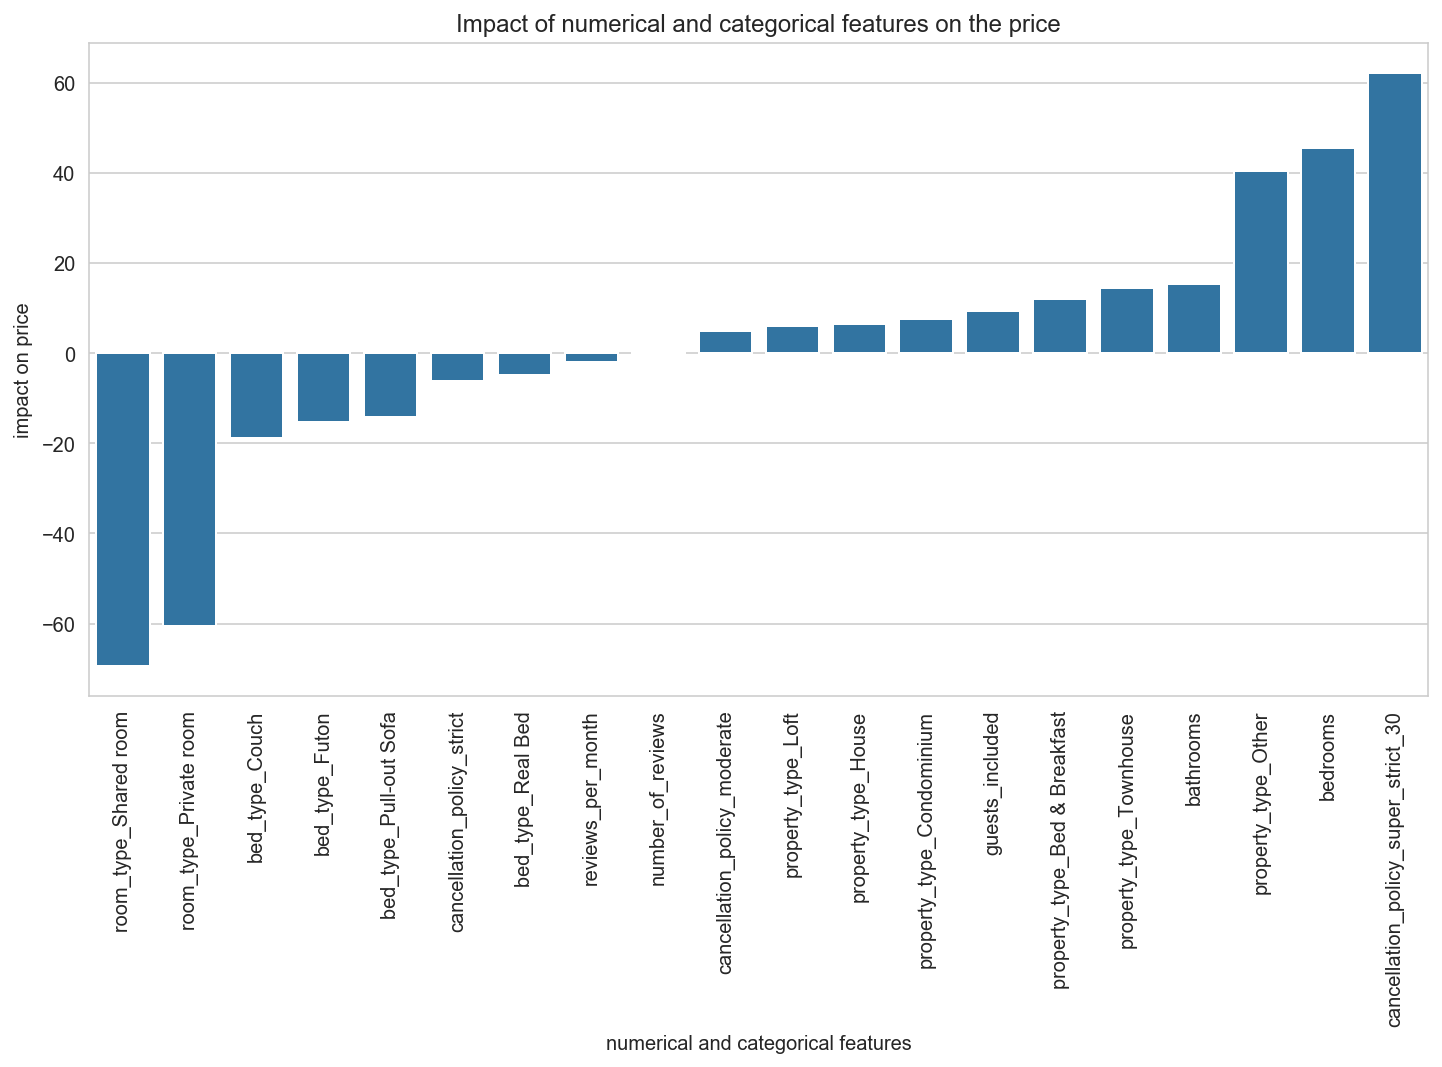

In [199]:
# plot each feature
fig = plt.subplots(figsize=(12,6))
sns.barplot(x=cat_num_features_coeff.index, y=cat_num_features_coeff['Coefficient'], 
            order=cat_num_features_coeff.sort_values('Coefficient').index,
            color=b_color)
plt.xticks(rotation='vertical')
plt.title('Impact of numerical and categorical features on the price')
plt.ylabel('impact on price')
plt.xlabel('numerical and categorical features')
#plt.savefig('Pictures/num_cat_features.png', dpi=200, bbox_inches='tight');

In [194]:
# remove unrelevant text from index
neighbourhood_coeff.index = neighbourhood_coeff.index.str.replace('neighbourhood_cleansed_', '')

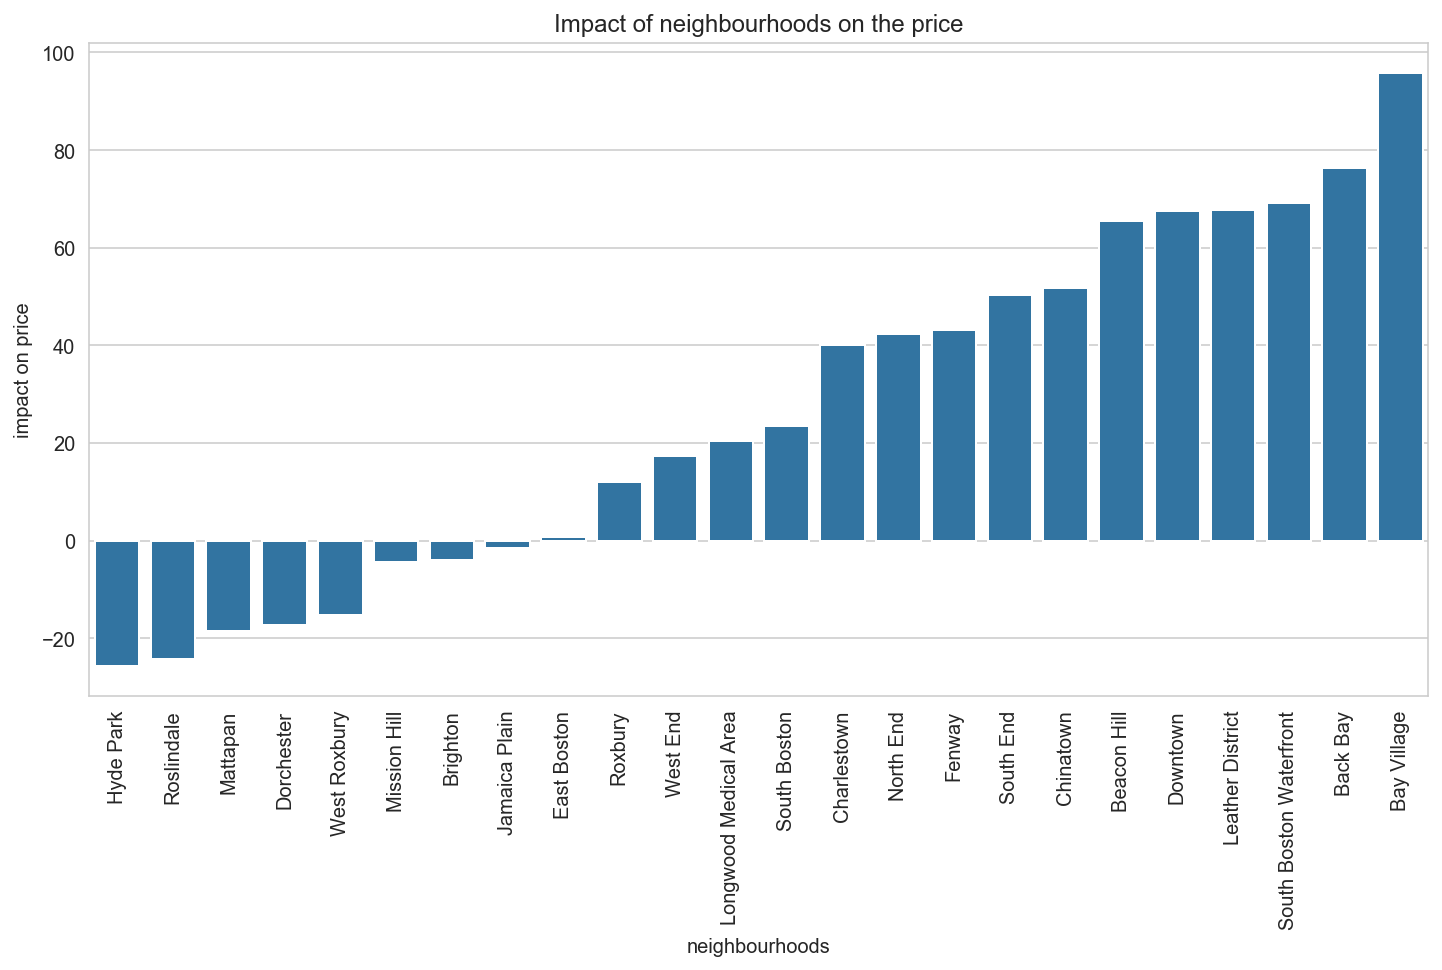

In [200]:
# plot each feature
fig = plt.subplots(figsize=(12,6))
sns.barplot(x=neighbourhood_coeff.index, y=neighbourhood_coeff['Coefficient'], 
            order=neighbourhood_coeff.sort_values('Coefficient').index,
            color=b_color)
plt.xticks(rotation='vertical')
plt.title('Impact of neighbourhoods on the price')
plt.ylabel('impact on price')
plt.xlabel('neighbourhoods')
#plt.savefig('Pictures/linreg_neigbourhoods.png', dpi=200, bbox_inches='tight');

<a id='q5'></a>
### Question 5: How does amenities impact the price?

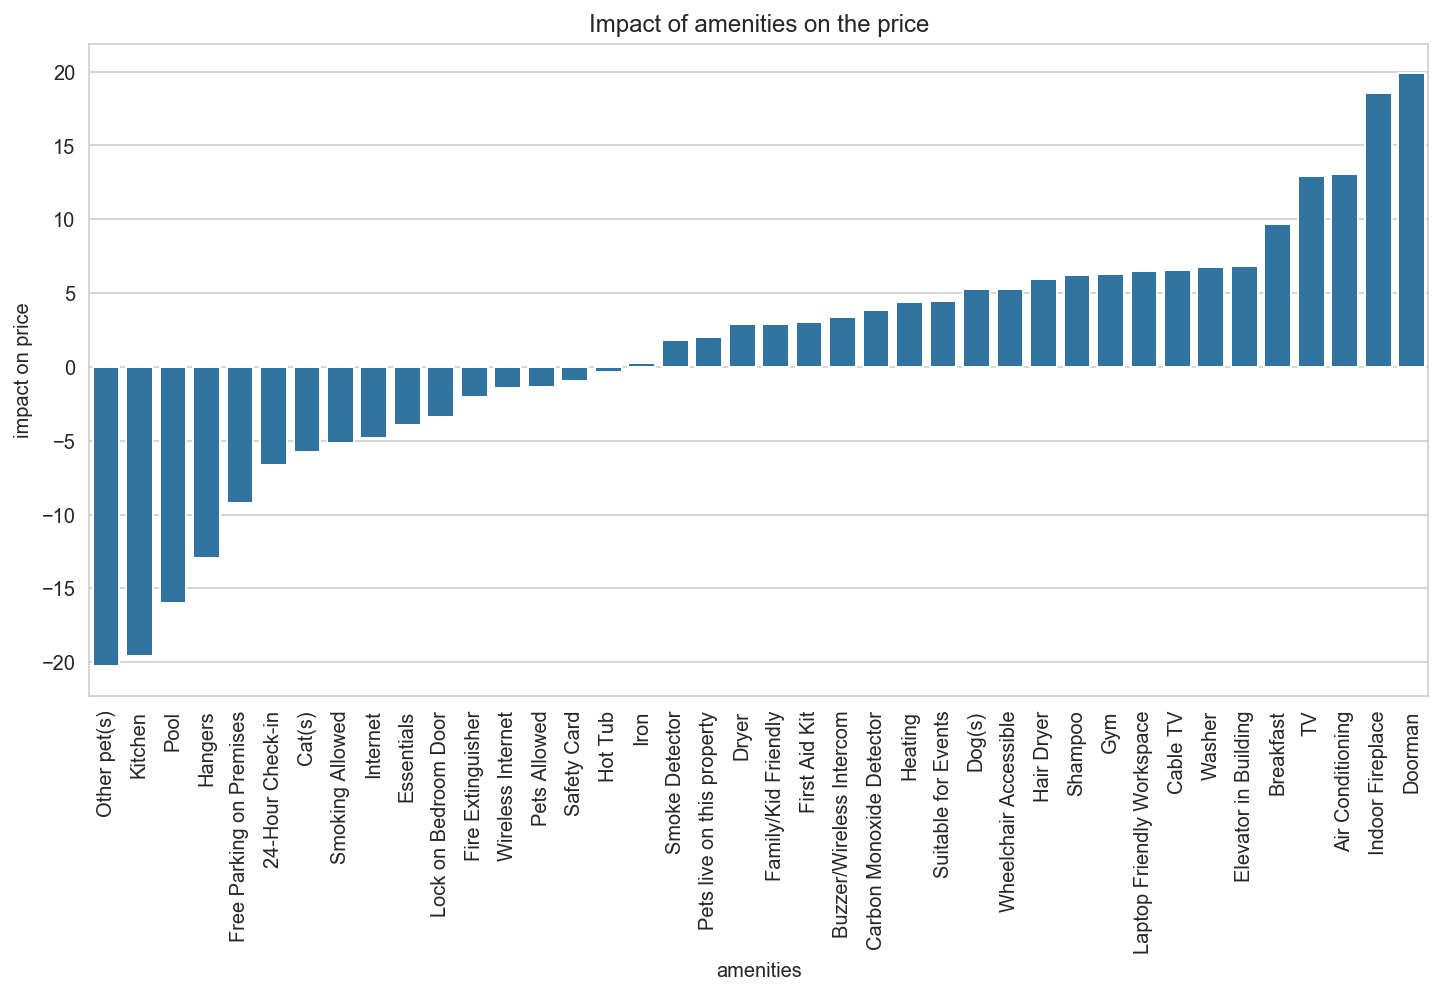

In [201]:
fig = plt.subplots(figsize=(12,6))
sns.barplot(x=amenity_coeff.index, y=amenity_coeff['Coefficient'], order=amenity_coeff.sort_values('Coefficient').index,
           color=b_color)
plt.xticks(rotation='vertical')
plt.title('Impact of amenities on the price')
plt.ylabel('impact on price')
plt.xlabel('amenities')
#plt.savefig('Pictures/amenities.png', dpi=200, bbox_inches='tight');

In [104]:
data = amenity_dummy.sum().values
index = amenity_dummy.sum().index

In [105]:
amenity_sum = pd.DataFrame(data, index)
amenity_sum.rename(columns={0: 'sum'}, inplace=True)

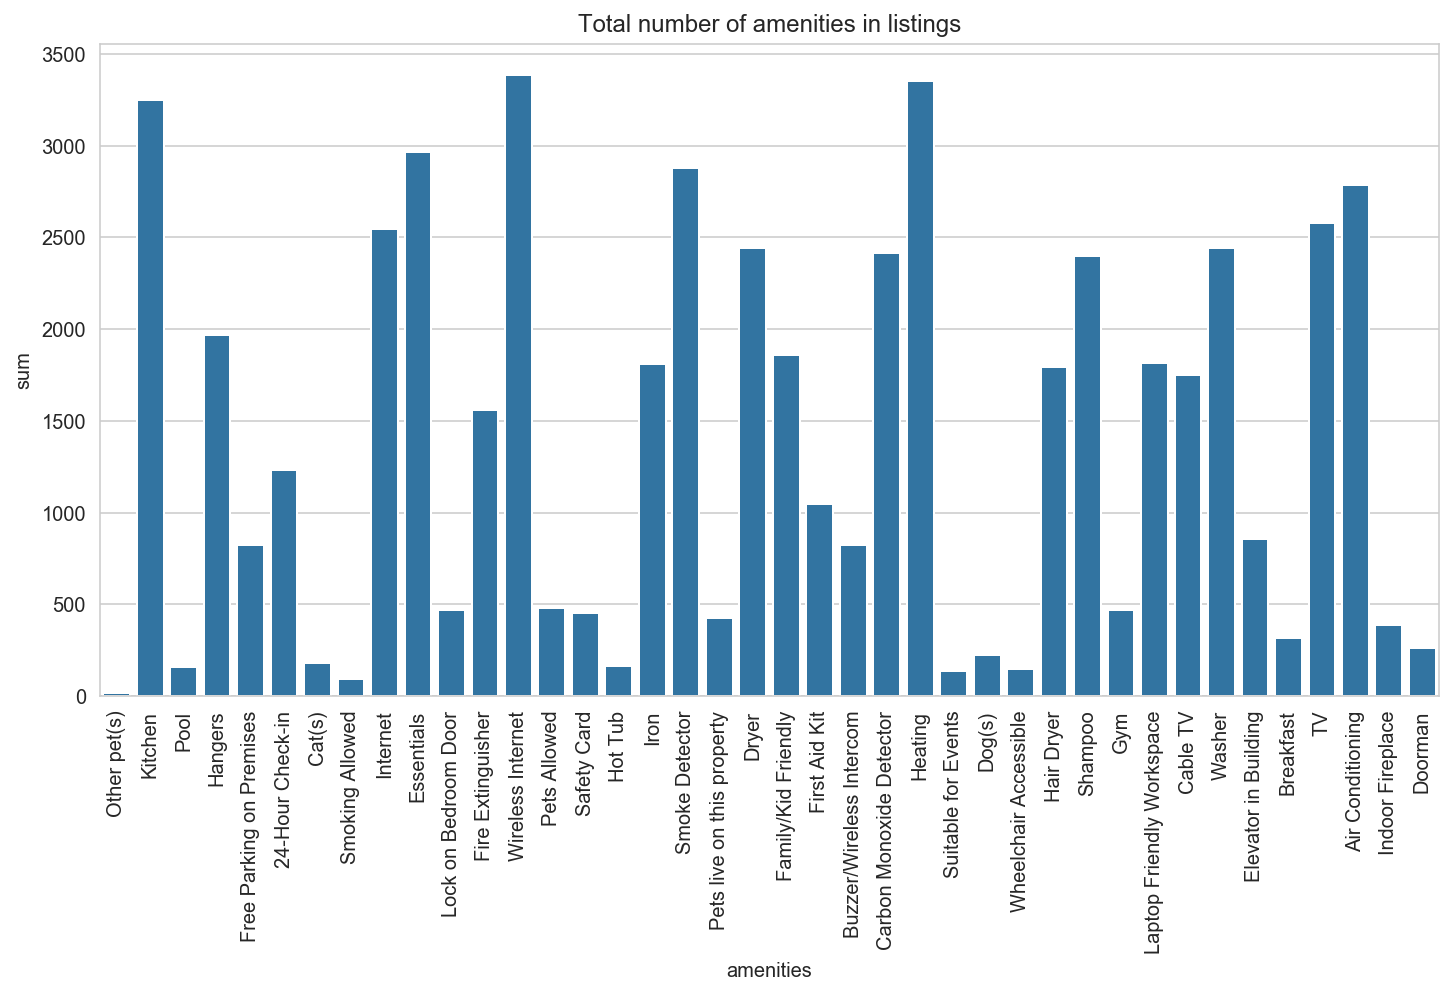

In [211]:
fig = plt.subplots(figsize=(12,6))
sns.barplot(x=amenity_sum.index, y=amenity_sum['sum'], order=amenity_coeff.sort_values('Coefficient').index,
           color=b_color)
plt.xticks(rotation='vertical')
plt.title('Total number of amenities in listings')
plt.xlabel('amenities');

<a id='resources'></a>
### Resources
- https://matplotlib.org/gallery/api/two_scales.html
- https://plotly.com/python/mapbox-layers/
- https://medium.com/analytics-vidhya/plotly-for-geomaps-bb75d1de189f
- https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b
- https://towardsdatascience.com/8-clutch-ways-to-impute-missing-data-690481c6cb2b
- https://stackoverflow.com/questions/36413314/filling-missing-data-by-random-choosing-from-non-missing-values-in-pandas-datafr